In [ ]:
# Import libraries
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Dataset path
data_dir = "/Users/shankarks/Documents/ece5831-2025-assignments/project/Vehicle_classfication/data_set/Vehicle/train"

# Define classes
classes = ["Cars", "Motorcycles", "Trains"]
img_size = 128

# Load and preprocess images
X, y = [], []
for idx, category in enumerate(classes):
    folder = os.path.join(data_dir, category)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = Image.open(img_path).convert("RGB")
        img = np.array(img)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(idx)

X = np.array(X) / 255.0
y = to_categorical(np.array(y), num_classes=len(classes))

print("Total samples:", X.shape[0])

Total samples: 1673


In [3]:
# Train / Validation split (80/20) - based on the random shuffleS
np.random.seed(0)

indices = np.arange(len(X))
np.random.shuffle(indices)

split_ratio = 0.8
split_index = int(len(X) * split_ratio)

train_idx = indices[:split_index]
val_idx = indices[split_index:]

X_train, X_val = X[train_idx], X[val_idx]
y_train, y_val = y[train_idx], y[val_idx]

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])

Training samples: 1338
Validation samples: 335


In [4]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

In [5]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=15
)

Epoch 1/15


2025-12-15 16:43:24.447725: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


42/42 [==============================] - 5s 111ms/step - loss: 1.1083 - accuracy: 0.4305 - val_loss: 0.9285 - val_accuracy: 0.6955
Epoch 2/15
42/42 [==============================] - 5s 107ms/step - loss: 0.9061 - accuracy: 0.5710 - val_loss: 0.7354 - val_accuracy: 0.6627
Epoch 3/15
42/42 [==============================] - 5s 108ms/step - loss: 0.7712 - accuracy: 0.6749 - val_loss: 0.7553 - val_accuracy: 0.6925
Epoch 4/15
42/42 [==============================] - 5s 110ms/step - loss: 0.7675 - accuracy: 0.6614 - val_loss: 0.7070 - val_accuracy: 0.6955
Epoch 5/15
42/42 [==============================] - 5s 110ms/step - loss: 0.6821 - accuracy: 0.7152 - val_loss: 0.6576 - val_accuracy: 0.7164
Epoch 6/15
42/42 [==============================] - 5s 111ms/step - loss: 0.6364 - accuracy: 0.7407 - val_loss: 0.5923 - val_accuracy: 0.7881
Epoch 7/15
42/42 [==============================] - 5s 112ms/step - loss: 0.5770 - accuracy: 0.7616 - val_loss: 0.6692 - val_accuracy: 0.7582
Epoch 8/15
42/42 

In [7]:
# Evaluate model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.2f}")

model.summary()

11/11 [==============================] - 0s 31ms/step - loss: 0.3762 - accuracy: 0.8478
Validation Accuracy: 0.85
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
        

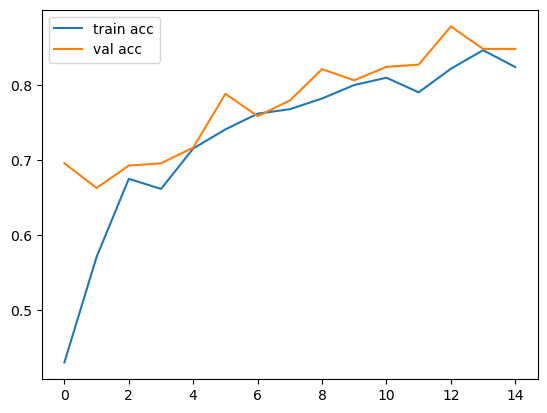

In [8]:
# Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [9]:
# test the model on test dataset
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical

test_dir = "/Users/shankarks/Documents/ece5831-2025-assignments/project/Vehicle_classfication/data_set/Vehicle/test"


test_images = []
test_labels = []
test_files = []

for idx, category in enumerate(classes):
    folder = os.path.join(test_dir, category)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = Image.open(img_path).convert("RGB")
        img = np.array(img)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            test_images.append(img)
            test_labels.append(idx)
            test_files.append(file)

X_test = np.array(test_images, dtype=np.float32) / 255.0
y_test = to_categorical(np.array(test_labels), num_classes=len(classes))

print("Total test samples:", X_test.shape[0])


Total test samples: 359


12/12 [==============================] - 0s 28ms/step

Test Accuracy: 0.8914

Confusion Matrix:
[[103   4  12]
 [  3 111   6]
 [  8   6 106]]

Classification Report:
Class            Precision     Recall   F1-score    Support
Cars                0.9035     0.8655     0.8841        119
Motorcycles         0.9174     0.9250     0.9212        120
Trains              0.8548     0.8833     0.8689        120

Showing random test samples:



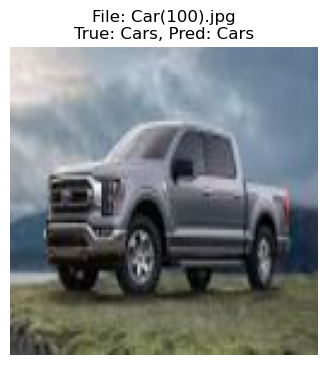

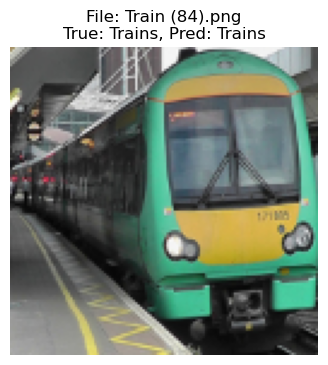

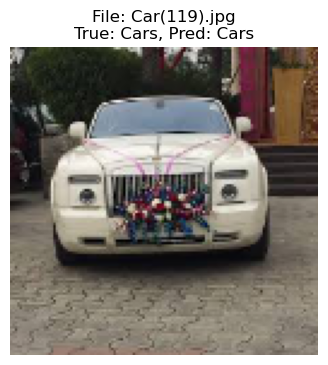

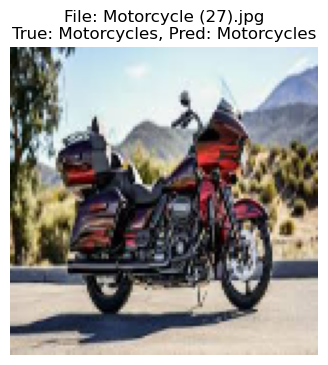

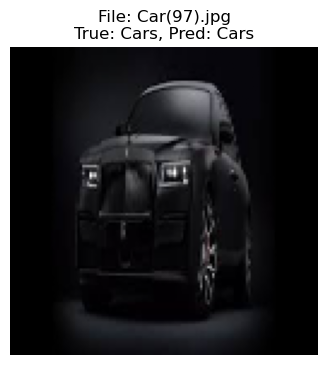

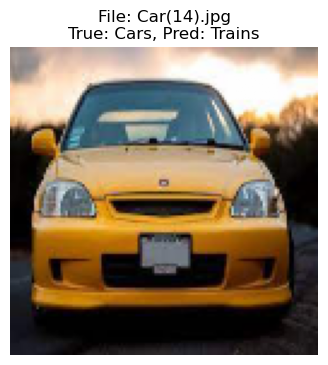

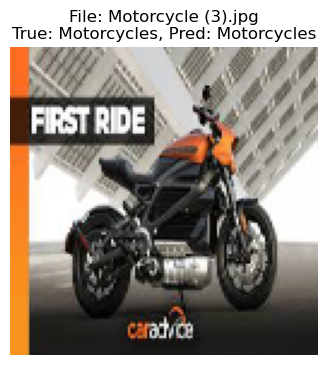

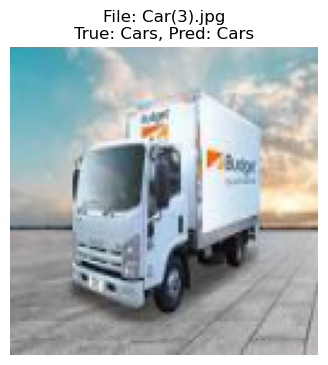

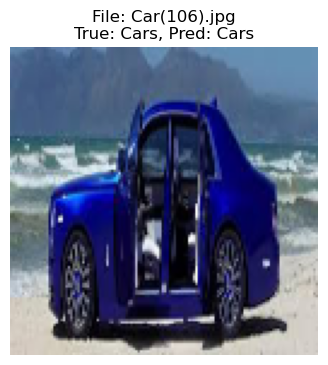

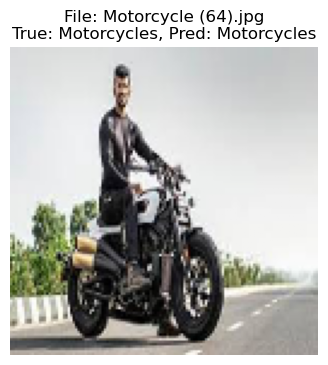

In [10]:
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test, axis=1)


accuracy = np.mean(pred_classes == true_classes)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Confusion Matrix

num_classes = len(classes)
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

for t, p in zip(true_classes, pred_classes):
    conf_matrix[t, p] += 1

print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report

print("\nClassification Report:")
print(f"{'Class':15s} {'Precision':>10s} {'Recall':>10s} {'F1-score':>10s} {'Support':>10s}")

for i, class_name in enumerate(classes):
    TP = conf_matrix[i, i]
    FP = conf_matrix[:, i].sum() - TP
    FN = conf_matrix[i, :].sum() - TP

    precision = TP / (TP + FP + 1e-8)
    recall = TP / (TP + FN + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    support = conf_matrix[i, :].sum()

    print(f"{class_name:15s} {precision:10.4f} {recall:10.4f} {f1:10.4f} {support:10d}")

# --------------------------------------------------
# Randomly choose 10 test images
# --------------------------------------------------
np.random.seed(0)  #
num_show = 10
random_indices = np.random.choice(len(X_test), size=num_show, replace=False)

print("\nShowing random test samples:\n")

for i in random_indices:
    plt.figure(figsize=(4,4))
    plt.imshow(X_test[i])
    plt.title(
        f"File: {test_files[i]}\n"
        f"True: {classes[true_classes[i]]}, "
        f"Pred: {classes[pred_classes[i]]}"
    )
    plt.axis("off")
    plt.show()